In [2]:
import pandas as pd
import numpy as np

In [3]:
boys = pd.read_csv("boys.csv", index_col=0)
girls = pd.read_csv("girls.csv", index_col=0)

## Definition: 
### A name is boring if it's associated discrete distribution is close to a uniform distribution.

### The Shannon-entropy $\sum p_i \times \log p_i$ is maximal for the uniform distribution. Dangerous! (Kullback-Leibler)

### The Euclidean norm $\sqrt{\sum p_i^2}$ is is minimal for the uniform distribution. 

In [4]:
from scipy.stats import entropy as e

def entropy(ts, base=None):
    ts = ts.dropna()/ts.sum()
    return e(ts, base=base)

def norm(ts):
    ts = ts.dropna()/ts.sum()
    return np.linalg.norm(ts, 2)

In [5]:
girls.apply(entropy).sort_values()

Malea        1.922015
Liridona     2.383276
Alea         2.489563
Erina        2.538360
Ela          2.562839
               ...   
Cécile       4.475675
Lidia        4.492047
Flora        4.493008
Anna         4.497587
Charlotte    4.499979
Length: 1001, dtype: float64

In [5]:
girls.apply(norm).sort_values()

Charlotte    0.108804
Flora        0.109369
Lidia        0.109463
Adrienne     0.110417
Cécile       0.110465
               ...   
Mila         0.299986
Erina        0.312320
Alea         0.316439
Liridona     0.386957
Malea        0.396190
Length: 1001, dtype: float64

In [6]:
boys.apply(entropy).sort_values()

Ajan       1.887003
Lio        2.198045
Lean       2.203565
Lian       2.341162
Timéo      2.407414
             ...   
Giacomo    4.428905
Carl       4.440666
Edouard    4.440675
Maurice    4.450051
Hugo       4.458888
Length: 1001, dtype: float64

In [7]:
boys.apply(norm).sort_values()

Hugo       0.111172
Giacomo    0.112030
Rémy       0.112625
Maurice    0.113068
Carl       0.113411
             ...   
Timéo      0.311135
Lian       0.340125
Lean       0.359315
Lio        0.374499
Ajan       0.423314
Length: 1001, dtype: float64

<AxesSubplot:>

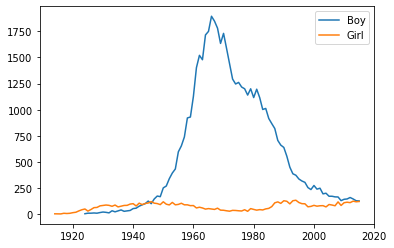

In [9]:
pair = pd.DataFrame({"Boy": boys["Thomas"].dropna(), "Girl": girls["Charlotte"].dropna()})
pair.plot()